# Day 6 "Lanternfish"

## Part 1

### Problem

The sea floor is getting steeper. Maybe the sleigh keys got carried this way?

A massive school of glowing lanternfish swims past. They must spawn quickly to reach such large numbers - maybe exponentially quickly? You should model their growth rate to be sure.

Although you know nothing about this specific species of lanternfish, you make some guesses about their attributes. Surely, each lanternfish creates a new lanternfish once every 7 days.

However, this process isn't necessarily synchronized between every lanternfish - one lanternfish might have 2 days left until it creates another lanternfish, while another might have 4. So, you can model each fish as a single number that represents the number of days until it creates a new lanternfish.

Furthermore, you reason, a new lanternfish would surely need slightly longer before it's capable of producing more lanternfish: two more days for its first cycle.

So, suppose you have a lanternfish with an internal timer value of 3:

* After one day, its internal timer would become 2.
* After another day, its internal timer would become 1.
* After another day, its internal timer would become 0.
* After another day, its internal timer would reset to 6, and it would create a new lanternfish with an internal timer of 8.
* After another day, the first lanternfish would have an internal timer of 5, and the second lanternfish would have an internal timer of 7.

A lanternfish that creates a new fish resets its timer to 6, not 7 (because 0 is included as a valid timer value). The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day.

Realizing what you're trying to do, the submarine automatically produces a list of the ages of several hundred nearby lanternfish (your puzzle input). For example, suppose you were given the following list:

        3,4,3,1,2

This list means that the first fish has an internal timer of 3, the second fish has an internal timer of 4, and so on until the fifth fish, which has an internal timer of 2. Simulating these fish over several days would proceed as follows:

        Initial state: 3,4,3,1,2
        After  1 day:  2,3,2,0,1
        After  2 days: 1,2,1,6,0,8
        After  3 days: 0,1,0,5,6,7,8
        After  4 days: 6,0,6,4,5,6,7,8,8
        After  5 days: 5,6,5,3,4,5,6,7,7,8
        After  6 days: 4,5,4,2,3,4,5,6,6,7
        After  7 days: 3,4,3,1,2,3,4,5,5,6
        After  8 days: 2,3,2,0,1,2,3,4,4,5
        After  9 days: 1,2,1,6,0,1,2,3,3,4,8
        After 10 days: 0,1,0,5,6,0,1,2,2,3,7,8
        After 11 days: 6,0,6,4,5,6,0,1,1,2,6,7,8,8,8
        After 12 days: 5,6,5,3,4,5,6,0,0,1,5,6,7,7,7,8,8
        After 13 days: 4,5,4,2,3,4,5,6,6,0,4,5,6,6,6,7,7,8,8
        After 14 days: 3,4,3,1,2,3,4,5,5,6,3,4,5,5,5,6,6,7,7,8
        After 15 days: 2,3,2,0,1,2,3,4,4,5,2,3,4,4,4,5,5,6,6,7
        After 16 days: 1,2,1,6,0,1,2,3,3,4,1,2,3,3,3,4,4,5,5,6,8
        After 17 days: 0,1,0,5,6,0,1,2,2,3,0,1,2,2,2,3,3,4,4,5,7,8
        After 18 days: 6,0,6,4,5,6,0,1,1,2,6,0,1,1,1,2,2,3,3,4,6,7,8,8,8,8

Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while each other number decreases by 1 if it was present at the start of the day.

In this example, after 18 days, there are a total of 26 fish. After 80 days, there would be a total of 5934.

Find a way to simulate lanternfish. How many lanternfish would there be after 80 days?

### Setup

Parse and style.

In [177]:
from utils import *

_input = initDay("day6")
_inputData = [int(v) for v in re.findall('(\d+)', _input)]

_sampleData = [3,4,3,1,2]

plotStyle()

def plot(data, days, minDay, extraScale, title):
    fish = init(data)
    for _ in range(days):
        fish = iter(fish)
    maxFish = max(fish)

    colors = ["#00568f","#007acc","#009fda","#80cfed","#a3e5ff","#ffd21f","#f99f50","#f3686d","#ed1c24","#ab0d12"] # thanks coolors.co!

    fish = init(data)
    plt.figure(figsize = (min(days/4, 10), 3))
    for day in range(days+1):
        for i, f in enumerate(reversed(fish)):
            c = int((f/(maxFish+1))*len(colors))
            plt.scatter(day, i, s=f*extraScale/maxFish*200, c=colors[c]) # TODO: ultraslow to do a point at a time
        fish = iter(fish)
    plt.gca().axes.set_xlim([minDay, days])
    plt.gca().axes.set_ylim([0, 8])
    plt.ylabel("phase")
    plt.xlabel("day")
    plt.title('   ' + f'{title} ({days} Days)')

### Solution

There's no need to keep track of individual fish, all we need is how many we have at each stage. Each day, we can move each group of fish to the next stage. Once a group hits 0, it gets moved back (added) to 6, and an equivalent amount created in stage 8.

The score is simply the sum.

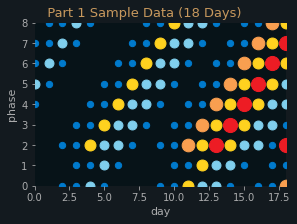

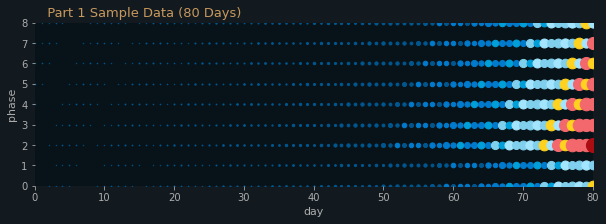

In [178]:
def init(start):
    fish = [0]*9
    for v in start:
        fish[v] += 1
    return fish

def iter(fish):
    fish = fish[1:]+fish[0:1]
    fish[6] += fish[8]
    return fish

def solve(start, days):
    fish = init(start)
    for _ in range(days):
        fish = iter(fish)
    return sum(fish)

check(solve(_sampleData, 18), 26)
plot(_sampleData, 18, 0, 1, 'Part 1 Sample Data')
check(solve(_sampleData, 80), 5934)
plot(_sampleData, 80, 0, 1, 'Part 1 Sample Data')

Part 1 Result: 388419


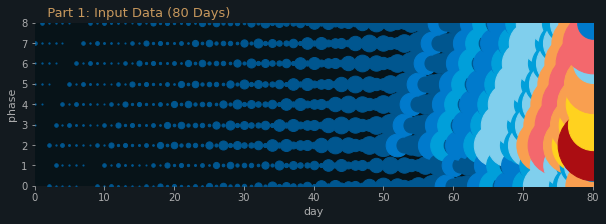

In [179]:
check1(solve(_inputData, 80))
plot(_inputData, 80, 0, 25, 'Part 1: Input Data')

## Part 2

### Problem

Suppose the lanternfish live forever and have unlimited food and space. Would they take over the entire ocean?

After 256 days in the example above, there would be a total of 26984457539 lanternfish!

How many lanternfish would there be after 256 days?

### Solution

Part 2 is identical to Part 1 with a bigger number of days. I suppose we're trying to catch people who implemented Part 1 tracking individual fish, and using 32 bit numbers?

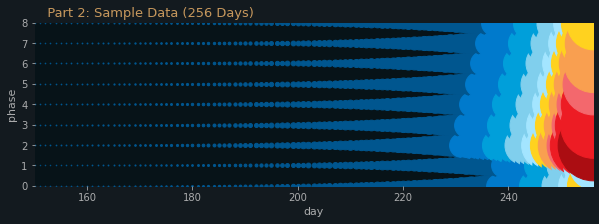

In [180]:
check(solve(_sampleData, 256), 26984457539)
plot(_sampleData, 256, 150, 25, 'Part 2: Sample Data')

Part 2 Result: 1740449478328


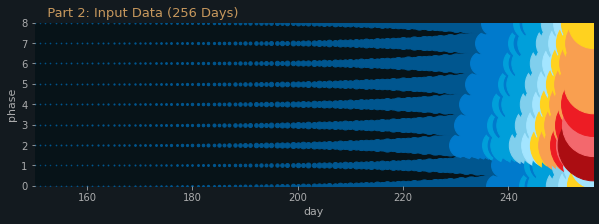

In [181]:
check2(solve(_inputData, 256))
plot(_inputData, 256, 150, 25, 'Part 2: Input Data')